# Hyperparameter tuning

## Part 1: Manual Hyperparameter Tuning
### Objective
Manually tune hyperparameters of a neural network and observe the impact on model performance.

### Setup
Start with the necessary imports and dataset preparation. We'll use the MNIST dataset for this exercise, as it's complex enough to demonstrate the effects of hyperparameter tuning.

In [192]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [175]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# We resize to have each image containing array have a sequence of numbers instead of x/y arrays.
# We than normalize the values by dividing.
X_train, X_test = X_train.reshape(-1, 784) / 255.0, X_test.reshape(-1, 784) / 255.0

# one hot encode the ground truth
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [176]:
print(X_train[:3])
print(y_train[:3])
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


## Task: Manual Tuning of Hyperparameters
1. Build a Base Model: Create a simple neural network as a starting point.
2. Manual Tuning: Experiment by manually changing hyperparameters like learning rate, number of layers/neurons, and activation functions.
3. Training and Evaluation: Train the model with different hyperparameter settings and evaluate its performance.

In [177]:

def build_model(learning_rate, layers_neurons, activation_function):    
    model = tf.keras.models.Sequential()
    
    # Same dimentions as the images (in sequential order)
    model.add(tf.keras.layers.InputLayer(input_shape=(784,)))
    
    for layer in layers_neurons:
        model.add(tf.keras.layers.Dense(layer, activation=activation_function))
    
    model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [198]:

# The code below goes over learn rate, layers, neurons and activation function
# major shortcoming:
# 1. Number of layers is currently static and rather hard to change, list comprehention wise.
# 2. Plots break down at anything higher than the current number of layer/neurons
# 3. Doesn't quite search the entire space of hyperparamters.. in fact not even close.
# 4. Doesn't plot loss

# But that's fine. This is only meant to be an excersize in what a fucking pain in the ass it'd be to implement a manual
# algorithm for reliably and easily searching the entire permutation space for all hyperparameters.
# Oh btw, the code is utter garbage.

def manual_search(learning_rates, layers_and_neurons, activation_functions):
    models = []
    plt.figure(figsize=(17, 5))


    # Loop through different hyperparameters and train models
    for i, learning_rate in enumerate(learning_rates, 1):
        plt.subplot(1, len(learning_rates), i)
        
        for layer_neuron in layers_and_neurons:
            
            for activation_function in activation_functions:
                
                model = build_model(learning_rate, layer_neuron, activation_function)
                
                print(f'Training: {learning_rate}, {layer_neuron}, {activation_function}')
                
                history = model.fit(X_train, y_train, epochs=2, verbose=0, validation_split=0.2)
                
                models.append({
                    'model': model,
                    'accuracy': history.history['val_accuracy']
                })
                
                
                #plt.plot(history.history['accuracy'], label=f'lr: {lr}')
                plt.plot(
                    history.history['val_accuracy'],
                    label=f'Layers/Neurons: {layer_neuron},\nActivation Function: {activation_function}'
                )

        plt.title(f'Learning Rate: {learning_rate}')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
        
    plt.tight_layout()
    plt.show()
    
    
    
    return models

Training: 0.001, (32, 32), relu
Training: 0.001, (32, 32), sigmoid
Training: 0.01, (32, 32), relu
Training: 0.01, (32, 32), sigmoid


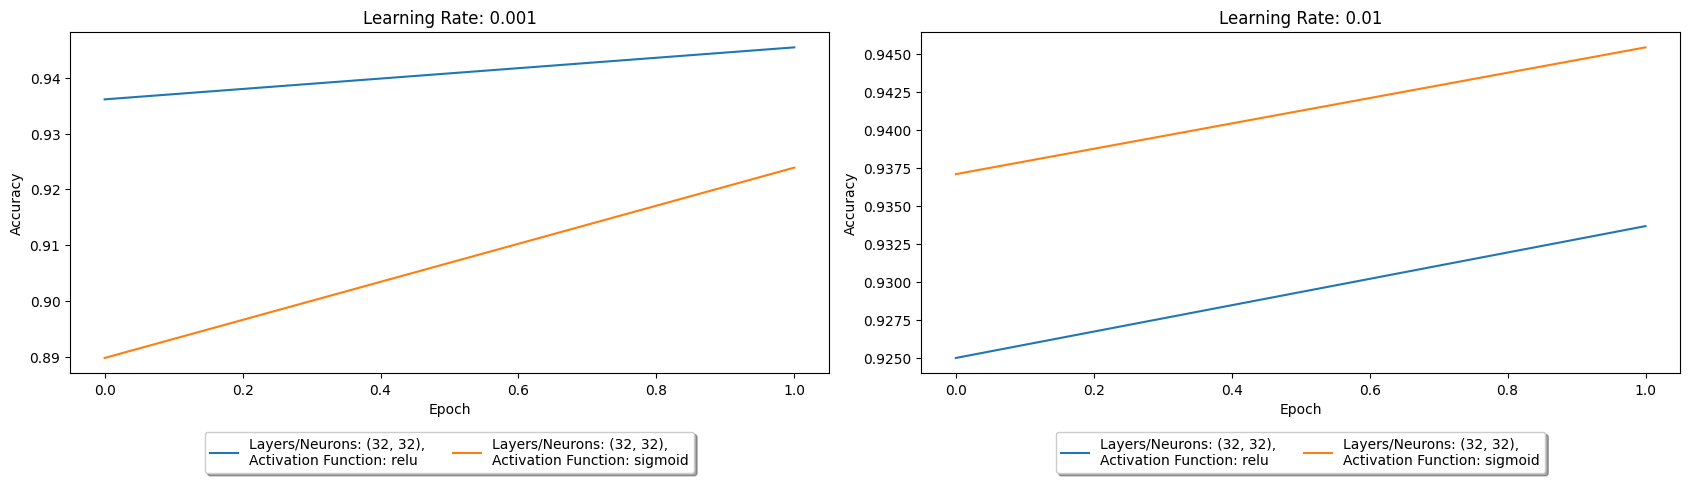

In [200]:
# Manually tuning, using the input parameters

learning_rates = [0.001, 0.01, 0.1]
layers_and_neurons = [
    (32, 32),
    (64, 64, 64),
    (128, 128, 128, 128)
]

activation_functions = ['relu', 'sigmoid']

models = manual_search(learning_rates, layers_and_neurons, activation_functions)

In [217]:
def find_best_model(models):
    #for model in models:
    #    model.predict(X_test, verbose=0)
    
    return models[0].predict(X_test, verbose=0)


models[0].

# preds = find_best_model(models)
# preds.round()

313/313 [==============================] - 1s 3ms/step


array([[1.00102654e-04, 3.26581812e-06, 2.38466589e-03, ...,
        9.97151256e-01, 1.26464793e-05, 1.73163608e-05],
       [7.45984726e-05, 1.55944122e-06, 9.33932900e-01, ...,
        5.42103029e-09, 1.10237102e-06, 5.97543195e-12],
       [6.87708089e-05, 9.84043956e-01, 1.10696806e-02, ...,
        6.48580818e-03, 4.67179436e-03, 8.62071174e-04],
       ...,
       [2.54044863e-07, 3.16457863e-06, 3.06664115e-05, ...,
        2.80615728e-04, 2.52062455e-04, 1.52450334e-03],
       [9.89582259e-06, 1.43160310e-03, 5.42402177e-07, ...,
        6.72693841e-06, 5.39358916e-05, 7.09951394e-07],
       [3.97276381e-06, 1.07599533e-07, 7.63022399e-05, ...,
        4.69859636e-08, 3.86528518e-06, 6.38587437e-07]], dtype=float32)

Training: 0.001, (32, 32), relu
Training: 0.001, (32, 32), sigmoid
Training: 0.001, (32, 64), relu
Training: 0.001, (32, 64), sigmoid
Training: 0.001, (64, 32), relu
Training: 0.001, (64, 32), sigmoid
Training: 0.001, (64, 64), relu
Training: 0.001, (64, 64), sigmoid
Training: 0.01, (32, 32), relu
Training: 0.01, (32, 32), sigmoid
Training: 0.01, (32, 64), relu
Training: 0.01, (32, 64), sigmoid
Training: 0.01, (64, 32), relu
Training: 0.01, (64, 32), sigmoid
Training: 0.01, (64, 64), relu
Training: 0.01, (64, 64), sigmoid
Training: 0.1, (32, 32), relu
Training: 0.1, (32, 32), sigmoid
Training: 0.1, (32, 64), relu
Training: 0.1, (32, 64), sigmoid
Training: 0.1, (64, 32), relu
Training: 0.1, (64, 32), sigmoid
Training: 0.1, (64, 64), relu
Training: 0.1, (64, 64), sigmoid


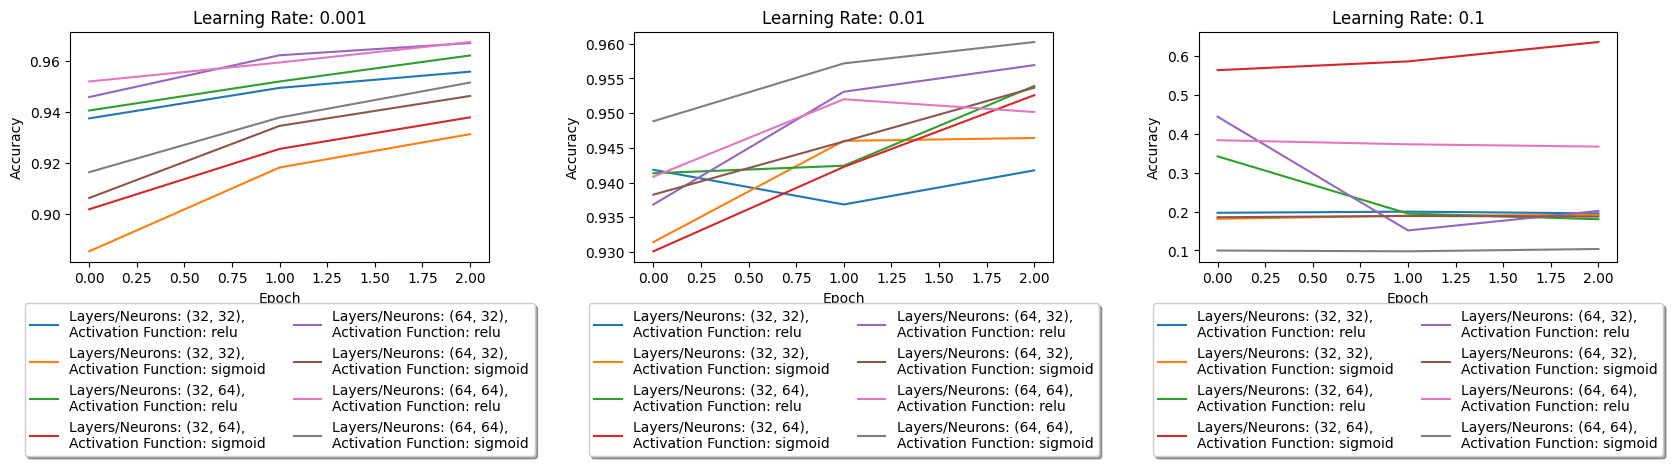

In [129]:
# Example of attempting to do a wider search

learning_rates = [0.001, 0.01, 0.1]

# THICC list comprehention to create every possible permutation of neuron and layer count
# output: (32, 32), (32, 64), (64, 32).. etc.
layers_and_neurons = [(i, f) for i in range(32, 96, 32) for f in range(32, 96, 32)]
activation_functions = ['relu', 'sigmoid']

manual_search(learning_rates, layers_and_neurons, activation_functions)


## Visualization
Plot the accuracy and loss for different hyperparameter settings.

## Analysis and Questions
* How did different learning rates affect the training process and model accuracy?
* What impact did varying the number of layers and neurons have on the model's performance?
* Were there any combinations of hyperparameters that resulted in particularly good or poor performance?


------------------------------
## Part 2: Automated Hyperparameter Tuning
### Objective
Use automated methods like Grid Search and Random Search for hyperparameter tuning.

### Setup
Reuse the MNIST dataset setup from Part 2.

### Task: Automated Hyperparameter Tuning
1. Grid Search and Random Search: Introduce and apply Grid Search and Random Search using scikit-learn's GridSearchCV or RandomizedSearchCV.
2. Integration with Keras: Show how to use these methods with Keras models.

In [191]:
# Define a function to create a model (for KerasClassifier)
def create_model_to_search(learning_rate, num_layers, hidden_units, activation):
    
    print(f'learning_rate={learning_rate}, num_layers={num_layers}, hidden_units={hidden_units}, activation={activation}')
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(784,)))
    
    for _ in range(num_layers):
        model.add(tf.keras.layers.Dense(hidden_units, activation=activation))
        
    model.add(tf.keras.layers.Dense(hidden_units, activation=activation))
    model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [190]:
# Set up GridSearchCV or RandomizedSearchCV
model_to_search = KerasClassifier(
    model=create_model_to_search,
    epochs=1,
    verbose=0
)

param_grid = {
    'model__learning_rate': [0.01, 0.1],
    'model__num_layers': [1, 2],
    'model__hidden_units': [32, 64],
    'model__activation': ['relu', 'sigmoid']
}

grid = GridSearchCV(estimator=model_to_search, param_grid=param_grid, cv=2)

# Run grid search
grid_result = grid.fit(X_train, y_train)

# Summarize results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Evaluate the best model on test data
best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy of the best model: {:.2f}%".format(test_accuracy * 100))

learning_rate=0.01, num_layers=1, hidden_units=32, activation=relu
learning_rate=0.01, num_layers=1, hidden_units=32, activation=relu
learning_rate=0.01, num_layers=2, hidden_units=32, activation=relu
learning_rate=0.01, num_layers=2, hidden_units=32, activation=relu


learning_rate=0.1, num_layers=1, hidden_units=32, activation=relu
learning_rate=0.1, num_layers=1, hidden_units=32, activation=relu
learning_rate=0.1, num_layers=2, hidden_units=32, activation=relu
learning_rate=0.1, num_layers=2, hidden_units=32, activation=relu
learning_rate=0.01, num_layers=1, hidden_units=64, activation=relu
learning_rate=0.01, num_layers=1, hidden_units=64, activation=relu
learning_rate=0.01, num_layers=2, hidden_units=64, activation=relu
learning_rate=0.01, num_layers=2, hidden_units=64, activation=relu
learning_rate=0.1, num_layers=1, hidden_units=64, activation=relu
learning_rate=0.1, num_layers=1, hidden_units=64, activation=relu
learning_rate=0.1, num_layers=2, hidden_units=64, activation=relu
learning_rate=0.1, num_layers=2, hidden_units=64, activation=relu
learning_rate=0.01, num_layers=1, hidden_units=32, activation=sigmoid
learning_rate=0.01, num_layers=1, hidden_units=32, activation=sigmoid
learning_rate=0.01, num_layers=2, hidden_units=32, activation=si

In [194]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

# confusion_matrix = metrics.confusion_matrix(actual, predicted)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show()

actual

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

## Visualization
Visualize the performance of the best model found by the search methods.
## Analysis and Questions
* Compare the results of manual tuning with automated tuning. Which method gave better results?
* What are the advantages and limitations of using automated methods like Grid Search and Random Search?

